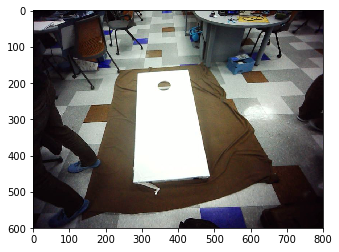

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

# Load original source
img = cv.imread('testpics/t5.png')
orig = img.copy()
plt.imshow(img)

# Utility functions for dealing with contours
def get_cnt_details(cnt):
    M = cv.moments(cnt)
    details = None
    
    if (M['m00'] != 0):
        details = {}
        details['cx'] = cx = int(M['m10']/M['m00'])
        details['cy'] = cy = int(M['m01']/M['m00'])
        details['area'] = area = cv.contourArea(cnt)
        details['perimeter'] = perimeter = cv.arcLength(cnt,True)

    return details

def print_cnt_details(cnt):
    cnt_dict = get_cnt_details(cnt)
    
    if (cnt_dict is None):
        return
    
    cx = cnt_dict['cx']
    cy = cnt_dict['cy']
    area = cnt_dict['area']
    perimeter = cnt_dict['perimeter']

    print('cx: ', cx, '\tcy: ', cy, '\tarea: ', area, '\tperimeter: ', perimeter)

def cnt_is_circular(cnt):
    cnt_det = get_cnt_details(cnt)
    if (cnt_det is None):
        return False
    area = cnt_det['area']
    approx = cv.approxPolyDP(cnt,0.01*cv.arcLength(cnt,True),True)
    return True if (area > 200 and area < 1000 and len(approx) > 8) else False

def cnt_is_board(cnt):
    cnt_det = get_cnt_details(cnt)
    if (cnt_det is None):
        return False
    area = cnt_det['area']
    approx = cv.approxPolyDP(cnt,0.01*cv.arcLength(cnt,True),True)
    return True if (area > 1000 and len(approx) < 8) else False

cx:  370 	cy:  326 	area:  51664.5 	perimeter:  1030.7766922712326
cx:  360 	cy:  218 	area:  117.0 	perimeter:  58.14213538169861
cx:  361 	cy:  203 	area:  483.5 	perimeter:  93.35533845424652
cx:  289 	cy:  174 	area:  2.0 	perimeter:  5.656854152679443
cx:  408 	cy:  150 	area:  6.0 	perimeter:  21.656854152679443
cx:  315 	cy:  124 	area:  85.5 	perimeter:  62.041630148887634


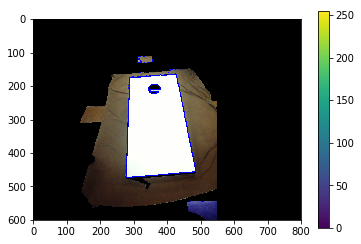

(<matplotlib.image.AxesImage at 0x7fe1404512e8>,
 None)

In [2]:
ex = img.copy()
mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

#rect = (140,450,260, 500) #y1y2,x1x2
rect = (100,100, 450,500)
cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

# threshold binarily
#ret,thresh = cv.threshold(img,127,255,cv.THRESH_BINARY)

# find contours
graysrc = cv.cvtColor(img.copy(), cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(graysrc, 127,255,0)
im2, contours, hierarchy = cv.findContours(thresh,cv.RETR_TREE, 1)

board_cnt = None
hole_cnt = None
for cnt in contours:
        
    print_cnt_details(cnt)
    if (cnt_is_circular(cnt)):
        hole_cnt = cnt
    if (cnt_is_board(cnt)):
        board_cnt = cnt

src_w_cnts = cv.drawContours(img.copy(), contours, -1, (0,0,255), 2)
plt.imshow(src_w_cnts),plt.colorbar(), plt.show()

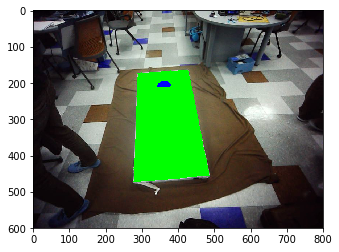

In [3]:


cv.drawContours(orig, [board_cnt], 0, (0,255,0), cv.FILLED)
cv.drawContours(orig, [hole_cnt], 0, (0,0,255), cv.FILLED)
plt.imshow(orig)